In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(50, activation='tanh'),  
    tf.keras.layers.Dense(1, use_bias=False)
])

# Initial condition
A = 0.

# The Psi_t function
def Psi_t(x):
    return A + x * N(x)

# The right-hand-side function
def f(x, Psi):
    return tf.exp(-x / 5.0) * tf.cos(x) - Psi / 5.0

# The loss function
def loss(x):
    x = tf.constant(x, dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        outputs = Psi_t(x)
        Psi_t_x = tape.gradient(outputs, x)
        loss_val = tf.reduce_mean(tf.square(Psi_t_x - f(x, outputs)))
    return loss_val

In [3]:
# The collocation points used by Lagaris
x = np.linspace(0, 2, 100)[:, None]

# Optimize using Gradient Descent optimizer
optimizer = tf.keras.optimizers.Adam()

# Run the optimizer
for i in range(1000):
    with tf.GradientTape() as tape:
        loss_val = loss(x)
    gradients = tape.gradient(loss_val, N.trainable_variables)
    optimizer.apply_gradients(zip(gradients, N.trainable_variables))

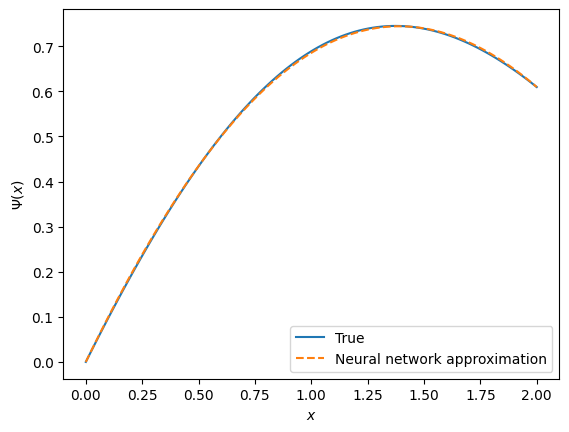

In [4]:
# Let's compare the result to the true solution
xx = np.linspace(0, 2, 100)[:, None]
yy = Psi_t(tf.constant(xx, dtype=tf.float32)).numpy()
yt = np.exp(-xx / 5.0) * np.sin(xx)

fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label='True')
ax.plot(xx, yy, '--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$\Psi(x)$')
plt.legend(loc='best')
plt.show()

In [11]:
loss_u = tf.reduce_mean(tf.square(yt - yy))
print(loss_u)



tf.Tensor(5.181587320799306e-06, shape=(), dtype=float64)
